<div dir = "rtl" style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=6 color=#F32500>
        <div  align=center>
            تمرین هفته هشتم بوت کمپ یادگیری ماشین-
            مپصا
        </div>
        <br/>
    </font>
</div>

<div id="bayes" style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=4>
		 سوال یک:‌ هدف از این سوال آشنایی با الگوریتم K نزدیکترین همسایه براي مسایل دسته بندي میباشد.
		مجموعه داده را از لینک زیر دانلود کنید و به سوالات پاسخ دهید.
		</br>
		</br>
</div>
		https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data

 <div id="bayes" style="direction:rtl;line-height:300%; padding-right: 200px;">
	<font face="XB Zar" size=4>
 الف- الگوریتم K نزدیکترین همسایه را با استفاده از معیار فاصله اقلیدسی پیاده سازي نمایید. در این پیاده سازي
از تمامی ویژگیهاي این مجموعه داده که شامل 13 ویژگی است، استفاده نمایید. این مجموعه داده شامل 303 شخص  میباشد که به دو کلاس بیمار و سالم تقسیم شدهاند. مقادیر 1 تا 7، 10 و 15 را براي این الگوریتم استفاده نمایید و بهترین
مقدار K را بدست آورید. لازم به ذکر است که در این بخش دادهها را به دو بخش یادگیري و آزمون با نسبت 2 به 1 تقسیم کنید. در نهایت دقت الگوریتم و ماتریس پریشانی را براي مجموعه داده آموزش و آزمون گزارش نمایید.
		</br>
		</br>
</div>

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [89]:
df=pd.read_csv('dataset.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


<AxesSubplot:>

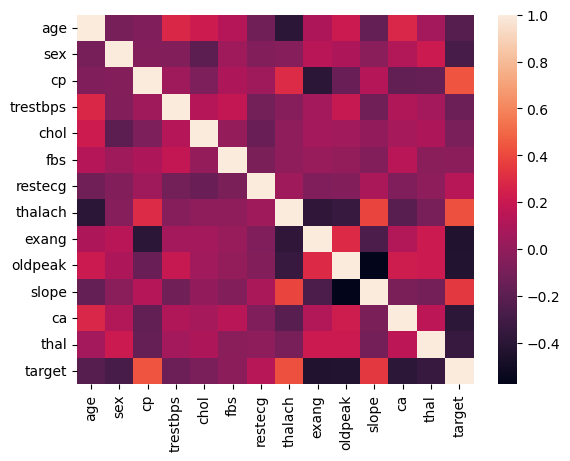

In [91]:
sns.heatmap(df.corr())

## find the most common element

In [92]:
def most_common(lst):
    return max(set(lst), key=lst.count)

## Euclidean distance

In [93]:
def euclidean(point, data):
    return np.sqrt(np.sum((point - data)**2, axis=1))

## Create KNN class

In [131]:
class KNeighbors():
    def __init__(self, k=5, dist_metric=euclidean):
        self.k = k
        self.dist_metric = dist_metric 
    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
        
    def predict(self, X_test):
        neighbors = []
        for x in X_test:
            distances = self.dist_metric(x, self.X_train)
            y_sorted = [y for _, y in sorted(zip(distances, self.y_train))]
            neighbors.append(y_sorted[:self.k])        
        return list(map(most_common, neighbors))
    def evaluate(self, X_test, y_test):
        y_pred = self.predict(X_test)
        accuracy = sum(y_pred == y_test) / len(y_test)
        return accuracy
    

In [132]:
X=df.iloc[:,0:-1].values
y=df.iloc[:,-1].values

In [133]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.5,random_state=0)

In [134]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score ,precision_score,recall_score,f1_score

In [135]:
k=(1,2,3,4,5,6,7,10,15)
for i in k:
    knn = KNeighbors(k=(i))
    knn.fit(X_train, y_train)
    Y_pred = knn.predict(X_test) 

    accuracy = accuracy_score(y_test,Y_pred)
    print(f' The accuracy of K:{i}: {accuracy}')
    cm = confusion_matrix(y_test, Y_pred)
    
    print(f' The cofuision matrix of K:{i}: {cm}')
    print()

 The accuracy of K:1: 0.5855263157894737
 The cofuision matrix of K:1: [[39 30]
 [33 50]]

 The accuracy of K:2: 0.631578947368421
 The cofuision matrix of K:2: [[55 14]
 [42 41]]

 The accuracy of K:3: 0.6513157894736842
 The cofuision matrix of K:3: [[41 28]
 [25 58]]

 The accuracy of K:4: 0.6644736842105263
 The cofuision matrix of K:4: [[48 21]
 [30 53]]

 The accuracy of K:5: 0.6381578947368421
 The cofuision matrix of K:5: [[39 30]
 [25 58]]

 The accuracy of K:6: 0.6578947368421053
 The cofuision matrix of K:6: [[47 22]
 [30 53]]

 The accuracy of K:7: 0.6710526315789473
 The cofuision matrix of K:7: [[41 28]
 [22 61]]

 The accuracy of K:10: 0.6842105263157895
 The cofuision matrix of K:10: [[46 23]
 [25 58]]

 The accuracy of K:15: 0.6776315789473685
 The cofuision matrix of K:15: [[43 26]
 [23 60]]



 <div id="bayes" style="direction:rtl;line-height:300%; padding-right: 200px;">
	<font face="XB Zar" size=4>
    ب- قسمت الف را فقط براي بهترین مقدار K ولی بدون نرمالسازي ویژگیها انجام دهید و نتیجه بهدستآمده را با
قسمت قبلی مقایسه نمایید. به صورت کلی استفاده از نرمالسازي چه تاثیري بر روي دستهبندي میتواند داشته باشد؟
 توضیح دهید.
</div>


In [99]:
# TODO

<div id="bayes" style="direction:rtl;line-height:300%; padding-right: 200px;">
	<font face="XB Zar" size=4>
ج- قسمت الف را بار دیگر با معیارهاي فاصله زیر انجام دهید.
</br>
1. Manhattan 2. Chebyshev
</div>

## Manhatan distance

In [100]:
def Manhatan(self, data1, data2):
    return sum(abs(data1 - data2))

In [101]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.5,random_state=0)

In [102]:
class KNeighborsClassifier1():
    def __init__(self, k=5, dist_metric=Manhatan):
        self.k = k
        self.dist_metric = dist_metric 
    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
        
    def predict(self, X_test):
        neighbors = []
        for x in X_test:
            distances = self.dist_metric(x, self.X_train,self.X_train)
            y_sorted = [y for _, y in sorted(zip(distances, self.y_train))]
            neighbors.append(y_sorted[:self.k])        
        return list(map(most_common, neighbors))
    def evaluate(self, X_test, y_test):
        y_pred = self.predict(X_test)
        accuracy = sum(y_pred == y_test) / len(y_test)
        return accuracy

In [103]:
k=(1,2,3,4,5,6,7,10,15)
for i in k:
    knn = KNeighborsClassifier1(k=(i))
    knn.fit(X_train, y_train)
    Y_pred = knn.predict(X_test) 

    accuracy = accuracy_score(y_test,Y_pred)
    print(f' The accuracy of K:{i}: {accuracy}')
    cm = confusion_matrix(y_test, Y_pred)
    
    print(f' The cofuision matrix of K:{i}: {cm}')
    print()

 The accuracy of K:1: 0.45394736842105265
 The cofuision matrix of K:1: [[69  0]
 [83  0]]

 The accuracy of K:2: 0.45394736842105265
 The cofuision matrix of K:2: [[69  0]
 [83  0]]

 The accuracy of K:3: 0.45394736842105265
 The cofuision matrix of K:3: [[69  0]
 [83  0]]

 The accuracy of K:4: 0.45394736842105265
 The cofuision matrix of K:4: [[69  0]
 [83  0]]

 The accuracy of K:5: 0.45394736842105265
 The cofuision matrix of K:5: [[69  0]
 [83  0]]

 The accuracy of K:6: 0.45394736842105265
 The cofuision matrix of K:6: [[69  0]
 [83  0]]

 The accuracy of K:7: 0.45394736842105265
 The cofuision matrix of K:7: [[69  0]
 [83  0]]

 The accuracy of K:10: 0.45394736842105265
 The cofuision matrix of K:10: [[69  0]
 [83  0]]

 The accuracy of K:15: 0.45394736842105265
 The cofuision matrix of K:15: [[69  0]
 [83  0]]



## Chebyshev distance

In [ ]:
# TODO

<div id="bayes" style="direction:rtl;line-height:300%; padding-right: 200px;">
	<font face="XB Zar" size=4>

سوال دو: در این تمرین از الگوریتم K نزدیکترین همسایه براي رگرسیون استفاده نمایید. مجموعه داده regression که در کنار
این فایل قرار داده شده است را به دو بخش آموزش و آزمون با نسبت 2 به 1 تقسیم نمایید. سپس بهترین مقدار K را با  آزمون خطا بهدست آورید. خطاي MSE را براي این مدل براي هر دو مجموعه داده آزمون و آموزش گزارش کنید. مجموعه داده آموزش و آزمون را با رنگهاي متفاوت در نموداري نمایش دهید.
</div>

In [121]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.pipeline import make_pipeline
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import confusion_matrix
import math
from mlxtend.plotting import plot_learning_curves

In [122]:
df1=pd.read_csv('regression.txt')
df1.head()

,x,y
0,0.010,0.958
1,0.014,1.034
2,0.018,1.109
3,0.022,1.094
4,0.027,1.104


In [123]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       240 non-null    float64
 1   y       240 non-null    float64
dtypes: float64(2)
memory usage: 3.9 KB


In [124]:
X1 = df.iloc[:, :-1].values
y1 = df.iloc[:,-1].values
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1 , test_size=0.5  )

R2:k=1: -0.008555962982364163
MSE:k=1: 0.5328947368421053
MAE :k=1 0.25
MAPE :k=1 622207843255134.4



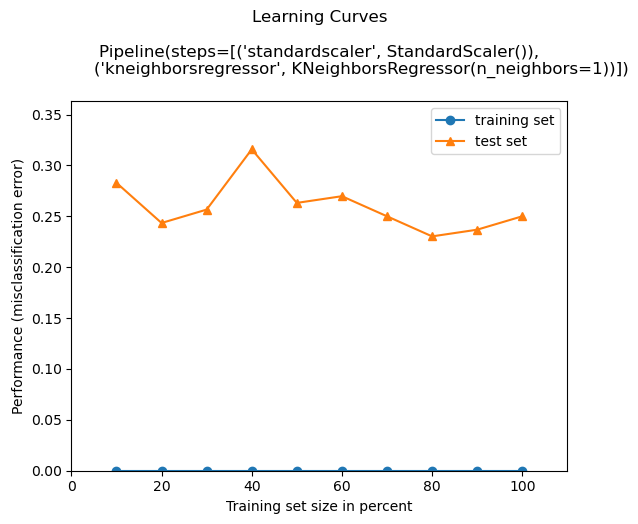

R2:k=2: 0.25021826436179506
MSE:k=2: 0.4555921052631579
MAE :k=2 0.24013157894736842
MAPE :k=2 607393370796678.8



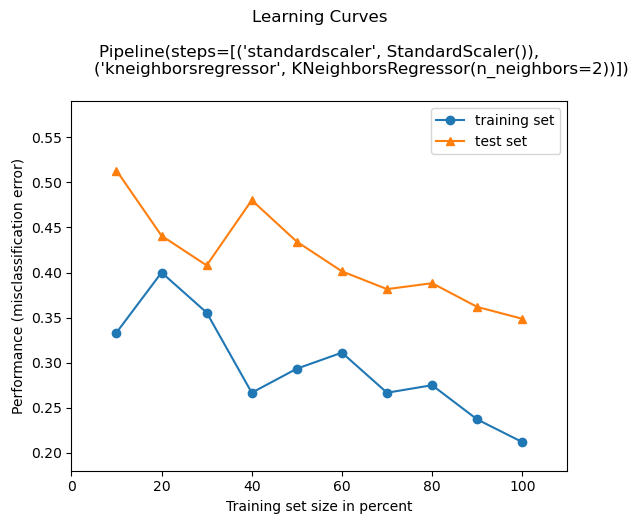

R2:k=3: 0.28634344139844403
MSE:k=3: 0.4247076023391813
MAE :k=3 0.2587719298245614
MAPE :k=3 661713103144349.2



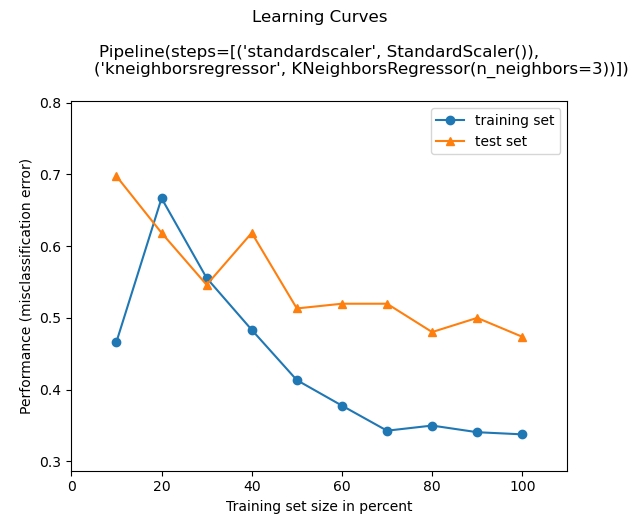

R2:k=4: 0.358040859088528
MSE:k=4: 0.39925986842105265
MAE :k=4 0.2582236842105263
MAPE :k=4 659244024401273.2



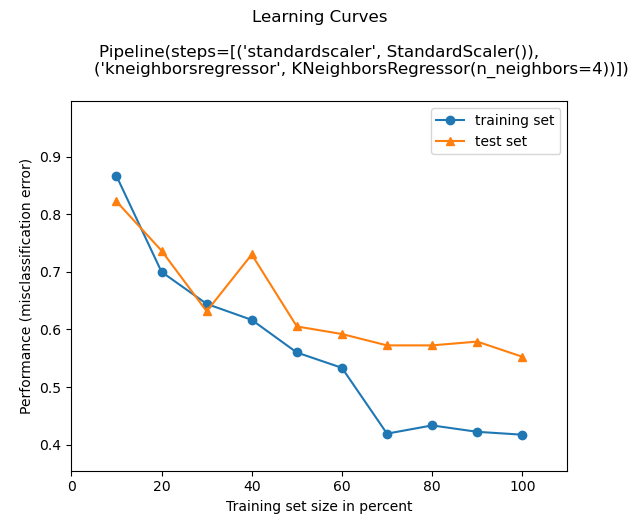

R2:k=5: 0.40760607647983227
MSE:k=5: 0.38236842105263164
MAE :k=5 0.2552631578947368
MAPE :k=5 639985210205281.1



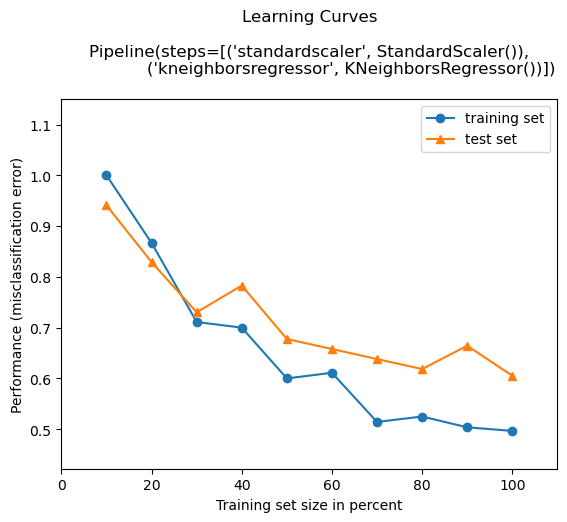

R2:k=6: 0.4500126108297926
MSE:k=6: 0.366593567251462
MAE :k=6 0.2565789473684211
MAPE :k=6 671589418116653.0



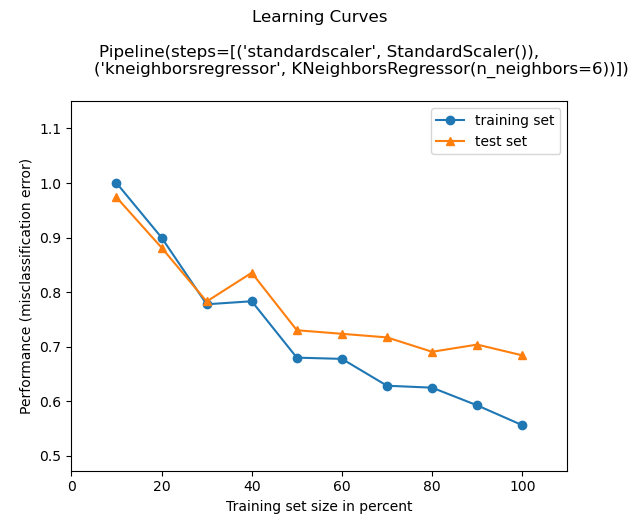

R2:k=7: 0.4708060280162353
MSE:k=7: 0.36143931256713213
MAE :k=7 0.2565789473684211
MAPE :k=7 685698439505658.2



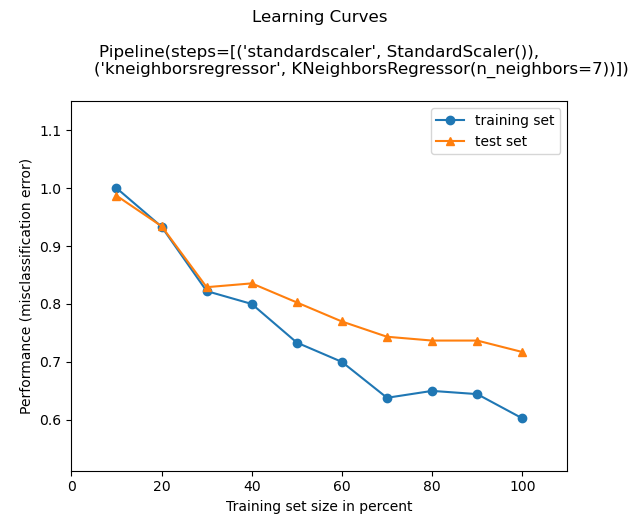

R2:k=8: 0.4729133927012398
MSE:k=8: 0.35762746710526316
MAE :k=8 0.2590460526315789
MAPE :k=8 692576587432798.4



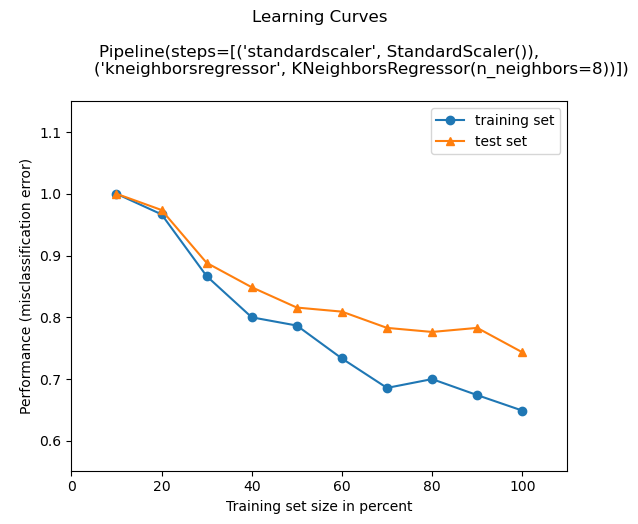

R2:k=9: 0.4980156805428908
MSE:k=9: 0.35761858349577647
MAE :k=9 0.2543859649122807
MAPE :k=9 674881523107420.9



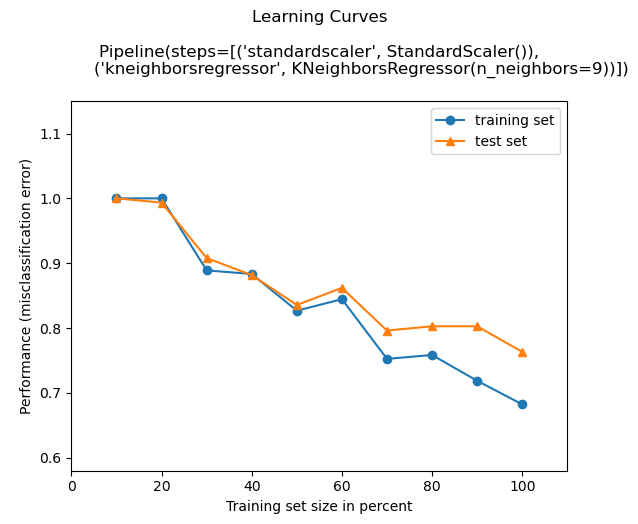

R2:k=10: 0.49996856993190153
MSE:k=10: 0.3555263157894737
MAE :k=10 0.2565789473684211
MAPE :k=10 663688366138810.1



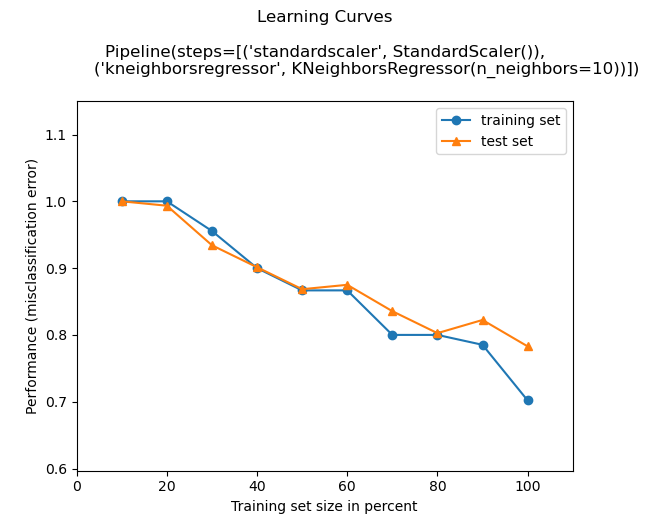

R2:k=11: 0.5036184984277752
MSE:k=11: 0.35330578512396693
MAE :k=11 0.2589712918660287
MAPE :k=11 673385111747981.0



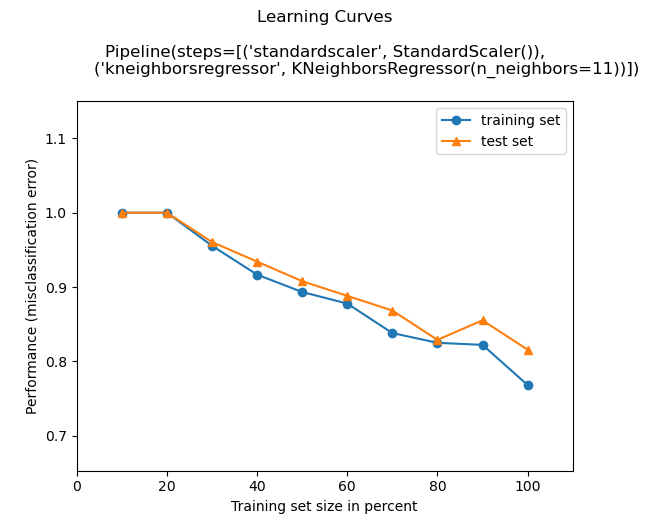

R2:k=12: 0.500329821702268
MSE:k=12: 0.35631396198830406
MAE :k=12 0.26151315789473684
MAPE :k=12 683934811832032.6



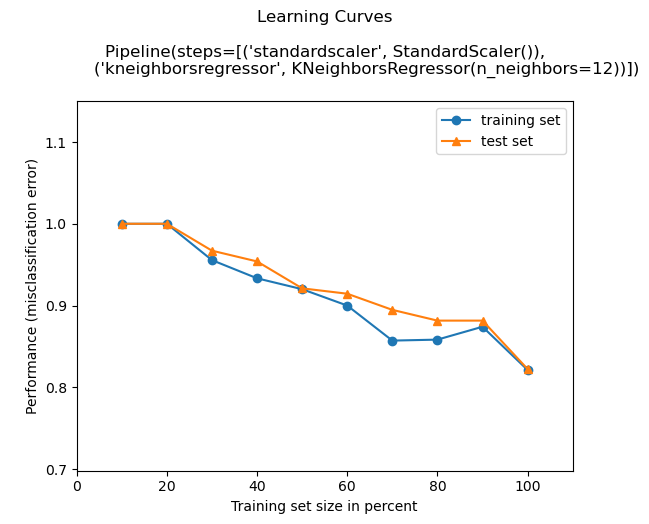

R2:k=13: 0.5106414854168411
MSE:k=13: 0.3556135160386173
MAE :k=13 0.2591093117408907
MAPE :k=13 674628284261977.2



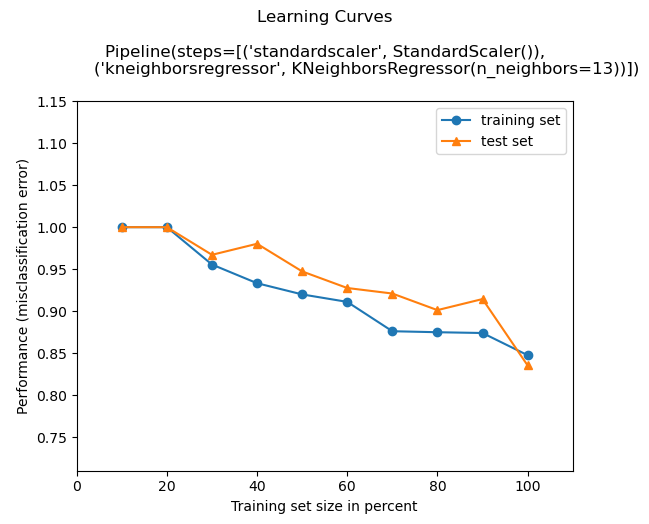

R2:k=14: 0.49964899527123585
MSE:k=14: 0.3552295918367347
MAE :k=14 0.2645676691729323
MAPE :k=14 685698439505658.4



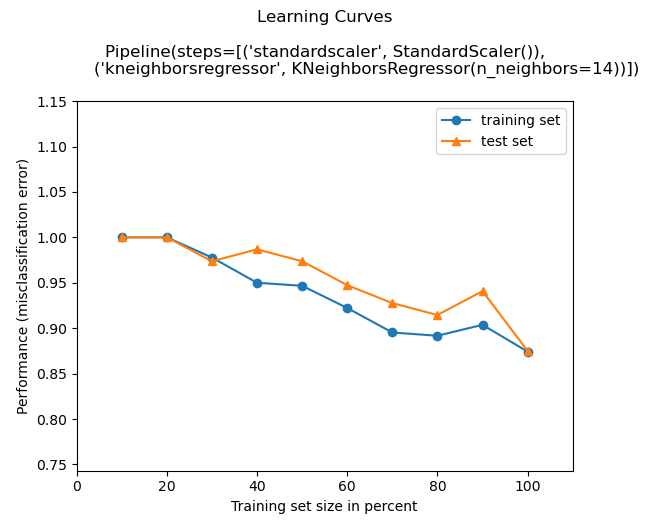

In [129]:
for i in range(1,15):
    model = make_pipeline(preprocessing.StandardScaler(), KNeighborsRegressor(n_neighbors=i))
    model.fit(X_train1, y_train1)

    model.fit(X_train1, y_train1)
    y_predict1= model.predict(X_test1)
    print(f"R2:k={i}: {metrics.r2_score(y_test1, y_predict1)}")
    print(f"MSE:k={i}: {metrics.mean_squared_error(y_test, y_predict1)}")
    print(f"MAE :k={i} {metrics.mean_absolute_error(y_test1, y_predict1)}")
    print(f"MAPE :k={i} {metrics.mean_absolute_percentage_error(y_test1, y_predict1)}")
    print()
    plot_learning_curves(X_train1, y_train1, X_test1, y_test1, model)
    plt.show()
    